# Data Exploration in Exercise 6
## 1 Introduction
Learn how to load and handle SCADA data



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
InputData = pd.read_csv('data_exercise_6_1_edp.csv',delimiter = ';') #contains one extra column with status flag.
InputData.head() # Show the first few rows of the data

#InputData = pd.read_csv('data_wind_prod.csv',delimiter = ';')   #83 columns. There is a strange format for the timestamp though.
#InputData.head() # Show the first few rows of the data

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Status_Flag
0,T01,2017-01-13 03:40:00+00:00,1262.1,205.9,852.9,474.8,35.0,54,55,55,...,0.0,-498.3,110.8,53.1,498.3,0.0,110.8,33,342.6,1
1,T07,2017-01-13 03:50:00+00:00,1359.1,236.2,769.7,465.0,38.0,60,60,59,...,0.0,-604.1,75.6,21.4,604.1,0.0,75.6,39,333.6,1
2,T07,2017-01-13 04:40:00+00:00,233.1,158.5,203.5,22.7,35.0,46,47,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,326.7,2
3,T07,2017-01-13 05:00:00+00:00,1250.7,113.7,351.2,388.3,33.0,42,42,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,310.1,2
4,T01,2017-01-13 05:00:00+00:00,206.4,143.0,158.0,14.5,30.0,36,36,36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,311.0,2


Be sure you read the timestamps as times

The timestamp data type looks correct but it is stored as strings rather than date variables - let us convert it to a datetime format, which is very useful as it allows directly to index data temporally:

Sort the timestamp and use it as index

In [4]:
InputData.Timestamp.values

InputData.Timestamp = pd.to_datetime(InputData.Timestamp)

InputData.Timestamp.values

InputData = InputData.sort_values('Timestamp').set_index('Timestamp')
InputData.head()

,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Status_Flag
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00+00:00,T07,1513.4,1255.3,1336.5,47.6,36.0,58,58,58,47,...,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,37,90.8,0
2017-01-01 00:00:00+00:00,T11,1679.5,1377.7,1596.9,68.6,41.0,62,62,62,25,...,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,38,102.4,0
2017-01-01 00:00:00+00:00,T01,1460.9,1239.2,1313.7,47.9,36.0,57,57,57,26,...,-621.9,-1000.0,67.1,978.4,1000.0,621.9,67.1,45,108.1,0
2017-01-01 00:00:00+00:00,T06,1464.0,1236.3,1318.6,52.4,39.0,54,56,56,28,...,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,34,91.7,0
2017-01-01 00:10:00+00:00,T01,1410.6,1229.4,1271.3,27.6,36.0,57,57,57,26,...,-477.2,-1000.0,120.9,900.7,1000.0,477.2,120.9,44,108.1,0


In [32]:
InputData['Rtr_RPM_Avg'].max()

14.9

In [10]:
InputData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209236 entries, 2017-01-01 00:00:00+00:00 to 2017-12-31 23:50:00+00:00
Data columns (total 83 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Turbine_ID                   209236 non-null  object 
 1   Gen_RPM_Max                  209236 non-null  float64
 2   Gen_RPM_Min                  209236 non-null  float64
 3   Gen_RPM_Avg                  209236 non-null  float64
 4   Gen_RPM_Std                  209236 non-null  float64
 5   Gen_Bear_Temp_Avg            209232 non-null  float64
 6   Gen_Phase1_Temp_Avg          209236 non-null  int64  
 7   Gen_Phase2_Temp_Avg          209236 non-null  int64  
 8   Gen_Phase3_Temp_Avg          209236 non-null  int64  
 9   Hyd_Oil_Temp_Avg             209236 non-null  int64  
 10  Gear_Oil_Temp_Avg            209236 non-null  int64  
 11  Gear_Bear_Temp_Avg           209236 non-null  int64  
 12  Nac_Temp_Avg

# Data visualization.

In [24]:
class Plotter():
    
    def __init__(self, wt_list):
        self.wt_list=wt_list

    
    def hist_plot(self,feature,bins=20, figsize=(8,8)):
        fig, axs=plt.subplots(2,2, figsize=figsize)
    
        for wt in enumerate(self.wt_list):
            if wt[0]==0:
                indx=(0,0)
                clr='b'
            elif wt[0]==1:
                indx=(0,1)
                clr='r'
            elif wt[0]==2:
                indx=(1,1)
                clr='g'
            else:
                indx=(1,0)
                clr='k'
            axs[indx].hist(InputData.loc[InputData.Turbine_ID==wt[1],feature], bins=bins, color=clr)
            axs[indx].set_title(wt[1]+' , '+feature)
            #plt.hist(InputData.loc[InputData.Turbine_ID==wt[1],feature])
    
    def box_plot(self,feature,bins=20, figsize=(8,8)):
        fig, axs=plt.subplots(2,2, figsize=figsize)
    
        for wt in enumerate(self.wt_list):
            if wt[0]==0:
                indx=(0,0)
                clr='b'
            elif wt[0]==1:
                indx=(0,1)
                clr='r'
            elif wt[0]==2:
                indx=(1,1)
                clr='g'
            else:
                indx=(1,0)
                clr='k'
            InputData.loc[InputData.Turbine_ID==wt[1],feature].plot(ax=axs[indx], kind='box', color=clr)



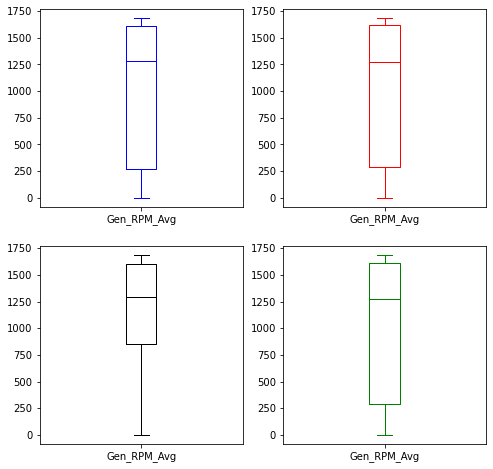

In [28]:
#FULL LIST []
obj=Plotter(wt_list=['T01','T06','T07','T11'])
obj.box_plot('Gen_RPM_Avg')

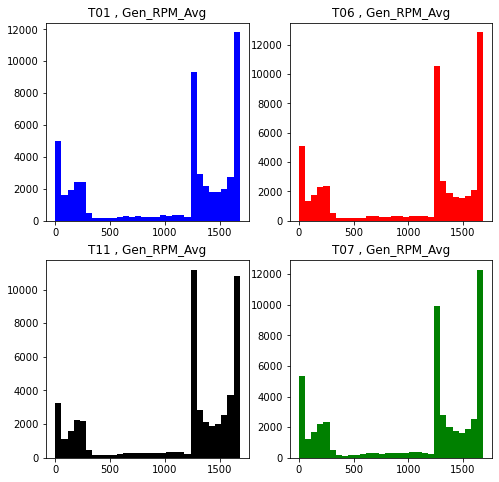

In [7]:
obj.hist_plot('Gen_RPM_Avg', bins=30)

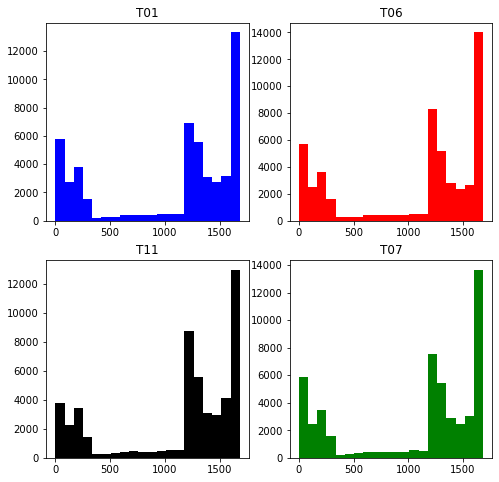

In [8]:
fig, axs=plt.subplots(2,2, figsize=(8,8))
axs[(0,0)].hist(InputData.loc[InputData.Turbine_ID=='T01','Gen_RPM_Avg'], bins=20, color='b')
axs[0,0].set_title('T01')

axs[0,1].hist(InputData.loc[InputData.Turbine_ID=='T06','Gen_RPM_Avg'], bins=20, color='r')
axs[0,1].set_title('T06')

axs[1,1].hist(InputData.loc[InputData.Turbine_ID=='T07','Gen_RPM_Avg'], bins=20, color='g')
axs[1,1].set_title('T07')

axs[1,0].hist(InputData.loc[InputData.Turbine_ID=='T11','Gen_RPM_Avg'], bins=20,color='k')
axs[1,0].set_title('T11')

plt.show()
#InputData.loc[InputData.Turbine_ID=='T01','Gen_RPM_Avg'].hist(bins=50)

In [60]:
InputData.describe()   #.Blds_PitchAngle

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Status_Flag
count,209236.000000,209236.000000,209236.000000,209236.000000,209232.000000,209236.000000,209236.000000,209236.000000,209236.000000,209236.000000,...,209236.000000,209236.000000,209236.000000,209236.000000,209236.000000,209236.000000,209236.000000,209236.000000,209236.000000,209236.000000
mean,1214.360313,957.865726,1090.380211,68.671508,46.835756,65.344520,65.196950,64.708726,35.659595,48.328366,...,-392.073651,-697.161206,75.115174,525.249817,683.708006,342.478397,82.342358,44.431613,169.259251,0.651661
std,620.747218,602.465282,600.943610,111.283806,15.399031,27.481171,26.617203,26.059419,7.400025,6.374523,...,391.385337,429.964697,95.863657,408.519407,428.205835,361.960973,98.670967,13.499365,95.868745,0.854951
min,0.000000,0.000000,0.000000,0.000000,18.000000,19.000000,19.000000,19.000000,20.000000,24.000000,...,-1000.000000,-1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000
25%,1255.400000,207.800000,422.675000,12.900000,35.000000,45.000000,45.000000,45.000000,30.000000,44.000000,...,-645.400000,-1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,94.900000,0.000000
50%,1430.700000,1231.100000,1277.800000,27.500000,44.000000,61.000000,62.000000,62.000000,35.000000,50.000000,...,-361.900000,-1000.000000,19.900000,548.700000,1000.000000,361.900000,35.200000,42.000000,120.800000,0.000000
75%,1689.600000,1379.600000,1608.800000,72.900000,57.000000,78.000000,78.000000,78.000000,41.000000,53.000000,...,0.000000,0.000000,141.100000,972.600000,1000.000000,562.500000,153.500000,54.000000,264.400000,2.000000
max,1934.600000,1675.600000,1685.000000,814.600000,97.000000,150.000000,143.000000,140.000000,55.000000,65.000000,...,0.000000,0.000000,500.000000,1000.000000,1000.000000,1000.000000,500.000000,205.000000,359.000000,2.000000


In [11]:
InputData.columns

Index(['Turbine_ID', 'Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg',
       'Gen_RPM_Std', 'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg',
       'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Hyd_Oil_Temp_Avg',
       'Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg',
       'Rtr_RPM_Max', 'Rtr_RPM_Min', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Max',
       'Amb_WindSpeed_Min', 'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std',
       'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg',
       'Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1',
       'Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_TotActPwr',
       'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1',
       'Prod_LatestAvg_ReactPwrGen2', 'Prod_LatestAvg_TotReactPwr',
       'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg',
       'HVTrafo_Phase3_Temp_Avg', 'Grd_InverterPhase1_Temp_Avg',
       'Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 'Cont_VCP_Temp_Avg',
       'Gen_SlipRing_Temp_Avg', 'Spin_Temp_Avg', '

<AxesSubplot:xlabel='Timestamp'>

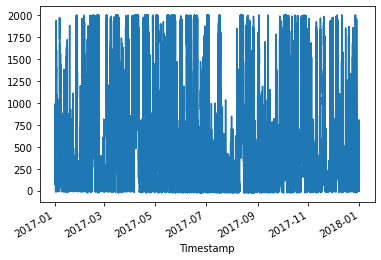

In [12]:
#InputData.loc[InputData.Turbine_ID=='T01','Grd_Prod_Pwr_Avg'].plot()

InputData.loc[ InputData.Turbine_ID=='T01' ,'Grd_Prod_Pwr_Avg'].plot()

<AxesSubplot:xlabel='Timestamp'>

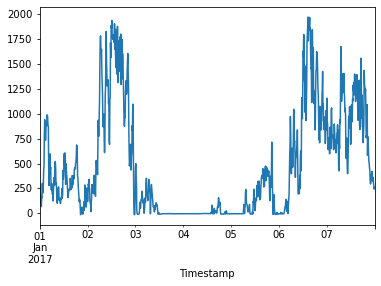

In [13]:
InputData.loc[InputData.Turbine_ID=='T01','Grd_Prod_Pwr_Avg']['2017-01-01':'2017-01-07'].plot()

<AxesSubplot:>

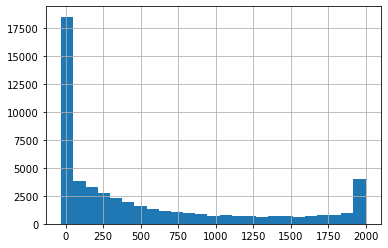

In [14]:
InputData.loc[InputData.Turbine_ID=='T01','Grd_Prod_Pwr_Avg'].hist(bins=25)

<AxesSubplot:xlabel='Grd_Prod_Pwr_Avg', ylabel='Count'>

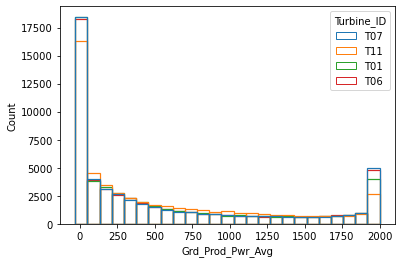

In [15]:
sns.histplot(data=InputData, x='Grd_Prod_Pwr_Avg', hue='Turbine_ID',fill=False, bins=25)


Descriptive statistics

In [16]:
InputData.loc[InputData.Turbine_ID=='T01','Grd_Prod_Pwr_Avg'].describe()

count    52244.000000
mean       540.894487
std        668.848655
min        -30.100000
25%         -3.300000
50%        227.500000
75%        906.825000
max       2000.100000
Name: Grd_Prod_Pwr_Avg, dtype: float64

In [17]:
TurbineIDs = InputData.Turbine_ID.unique()
ChannelNames = InputData.columns.values
print(TurbineIDs)
print(ChannelNames)

['T07' 'T11' 'T01' 'T06']
['Turbine_ID' 'Gen_RPM_Max' 'Gen_RPM_Min' 'Gen_RPM_Avg' 'Gen_RPM_Std'
 'Gen_Bear_Temp_Avg' 'Gen_Phase1_Temp_Avg' 'Gen_Phase2_Temp_Avg'
 'Gen_Phase3_Temp_Avg' 'Hyd_Oil_Temp_Avg' 'Gear_Oil_Temp_Avg'
 'Gear_Bear_Temp_Avg' 'Nac_Temp_Avg' 'Rtr_RPM_Max' 'Rtr_RPM_Min'
 'Rtr_RPM_Avg' 'Amb_WindSpeed_Max' 'Amb_WindSpeed_Min' 'Amb_WindSpeed_Avg'
 'Amb_WindSpeed_Std' 'Amb_WindDir_Relative_Avg' 'Amb_WindDir_Abs_Avg'
 'Amb_Temp_Avg' 'Prod_LatestAvg_ActPwrGen0' 'Prod_LatestAvg_ActPwrGen1'
 'Prod_LatestAvg_ActPwrGen2' 'Prod_LatestAvg_TotActPwr'
 'Prod_LatestAvg_ReactPwrGen0' 'Prod_LatestAvg_ReactPwrGen1'
 'Prod_LatestAvg_ReactPwrGen2' 'Prod_LatestAvg_TotReactPwr'
 'HVTrafo_Phase1_Temp_Avg' 'HVTrafo_Phase2_Temp_Avg'
 'HVTrafo_Phase3_Temp_Avg' 'Grd_InverterPhase1_Temp_Avg'
 'Cont_Top_Temp_Avg' 'Cont_Hub_Temp_Avg' 'Cont_VCP_Temp_Avg'
 'Gen_SlipRing_Temp_Avg' 'Spin_Temp_Avg' 'Blds_PitchAngle_Min'
 'Blds_PitchAngle_Max' 'Blds_PitchAngle_Avg' 'Blds_PitchAngle_Std'
 'Cont_VCP_Chokco

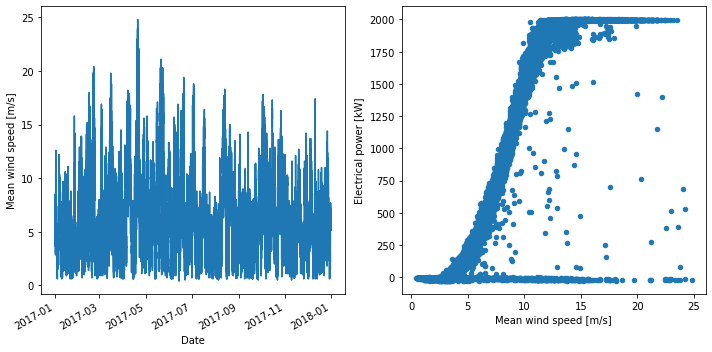

In [18]:
fig_pd,axs_pd = plt.subplots(1,2,figsize = (10,5))
InputData.loc[InputData.Turbine_ID=='T01','Amb_WindSpeed_Avg'].plot(ax=axs_pd[0])
plt.setp(axs_pd[0], xlabel = 'Date', ylabel = 'Mean wind speed [m/s]')
InputData.loc[InputData.Turbine_ID=='T01',:].plot(ax=axs_pd[1], x='Amb_WindSpeed_Avg', y='Grd_Prod_Pwr_Avg', kind='scatter')
plt.setp(axs_pd[1], xlabel = 'Mean wind speed [m/s]', ylabel = 'Electrical power [kW]')
plt.tight_layout()             
plt.show()

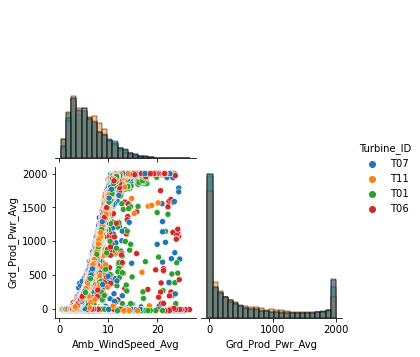

In [22]:
sns.pairplot(InputData.loc[:,['Turbine_ID','Amb_WindSpeed_Avg','Grd_Prod_Pwr_Avg']], hue='Turbine_ID', 
             corner=True, diag_kind='hist', diag_kws={'bins':25})


# Operational conditions (based on filters)

Now the sorting looks better but it is also obvious that the data may need filtering as there are some data points where there is no normal production. So let us make some more overview plots. We will now also make use of the second index we created in the data frame, corresponding to turbine names, so that we can easily select data from one turbine at a time. The same procedure could also be carried out using a boolean mask as shown in the cell below:

In [37]:
InputData['Grd_Prod_Pwr_Max'].describe()

count    209236.000000
mean        773.822302
std         796.785339
min         -28.100000
25%          -1.100000
50%         451.400000
75%        1502.200000
max        2120.400000
Name: Grd_Prod_Pwr_Max, dtype: float64

In [23]:
T01mask = InputData.Turbine_ID == 'T01'

MaxPowerMask = InputData.Grd_Prod_Pwr_Max >= 1
MinPowerMask = InputData.Grd_Prod_Pwr_Min <= 1
MinRPMMask = InputData.Gen_RPM_Min >= 1150
MaxRPMMask = InputData.Gen_RPM_Max >= 1250

OperationalMask = MaxRPMMask & ~MinPowerMask
TransientMask = MaxPowerMask & MaxRPMMask & ~OperationalMask
IdlingMask = ~OperationalMask & ~TransientMask

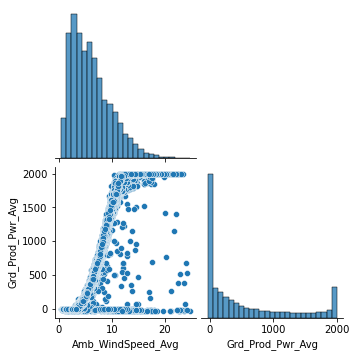

In [24]:
sns.pairplot(InputData.loc[T01mask,['Amb_WindSpeed_Avg','Grd_Prod_Pwr_Avg']], 
             corner=True, diag_kws={'bins':25})


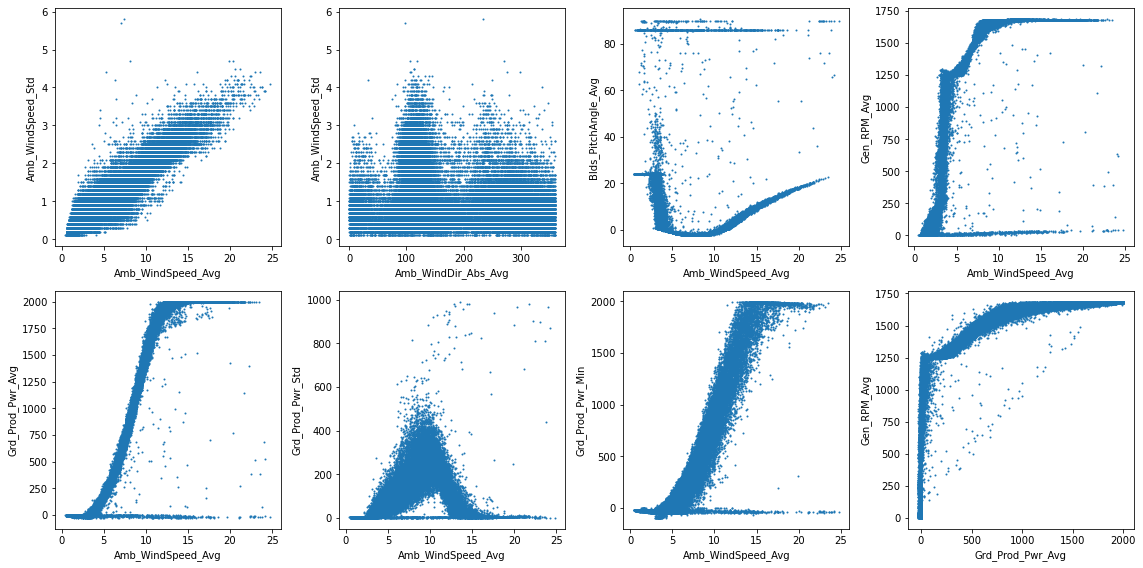

In [25]:
plt.rc('font', size=10) 
fig3 = plt.figure(figsize = (16,8))
fig3.add_subplot(2,4,1)
plt.plot(InputData.Amb_WindSpeed_Avg[T01mask],InputData.Amb_WindSpeed_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Amb_WindSpeed_Std')
fig3.add_subplot(2,4,2)
plt.plot(InputData.Amb_WindDir_Abs_Avg[T01mask],InputData.Amb_WindSpeed_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindDir_Abs_Avg')
plt.ylabel('Amb_WindSpeed_Std')
fig3.add_subplot(2,4,3)
plt.plot(InputData.Amb_WindSpeed_Avg[T01mask],InputData.Blds_PitchAngle_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Blds_PitchAngle_Avg')
fig3.add_subplot(2,4,4)
plt.plot(InputData.Amb_WindSpeed_Avg[T01mask],InputData.Gen_RPM_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Gen_RPM_Avg')
fig3.add_subplot(2,4,5)
plt.plot(InputData.Amb_WindSpeed_Avg[T01mask],InputData.Grd_Prod_Pwr_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Avg')
fig3.add_subplot(2,4,6)
plt.plot(InputData.Amb_WindSpeed_Avg[T01mask],InputData.Grd_Prod_Pwr_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Std')
fig3.add_subplot(2,4,7)
plt.plot(InputData.Amb_WindSpeed_Avg[T01mask],InputData.Grd_Prod_Pwr_Min[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Min')
fig3.add_subplot(2,4,8)
plt.plot(InputData.Grd_Prod_Pwr_Avg[T01mask],InputData.Gen_RPM_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Grd_Prod_Pwr_Avg')
plt.ylabel('Gen_RPM_Avg')


plt.tight_layout()             
plt.show()

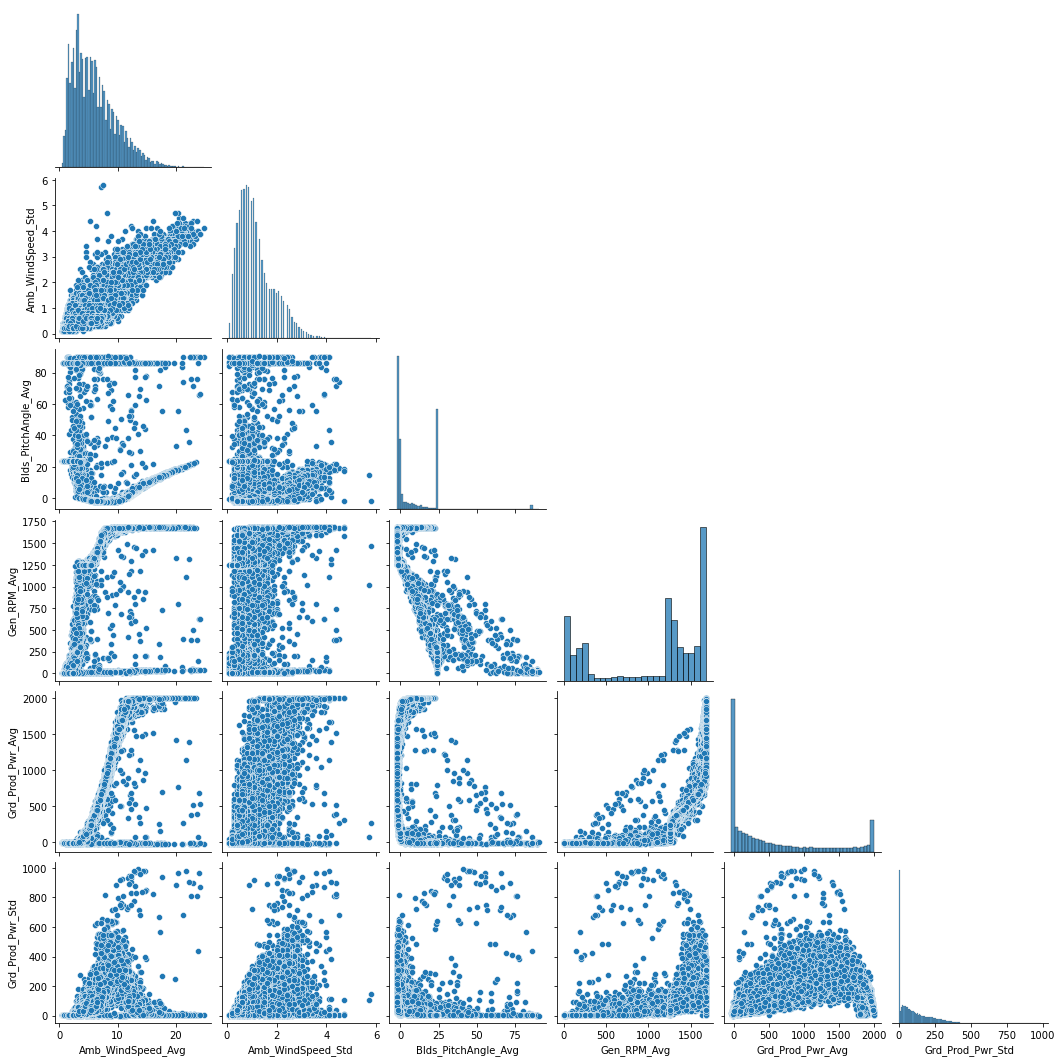

In [26]:
sns.pairplot(InputData.loc[T01mask,['Amb_WindSpeed_Avg','Amb_WindSpeed_Std',
                                    'Blds_PitchAngle_Avg','Gen_RPM_Avg',
                                    'Grd_Prod_Pwr_Avg','Grd_Prod_Pwr_Std']], corner=True)


In [27]:
TurbineOK = InputData.Status_Flag==0
TurbineTransient = InputData.Status_Flag == 1
TurbineIdling = InputData.Status_Flag == 2

In [39]:
type(TurbineOK)

pandas.core.series.Series

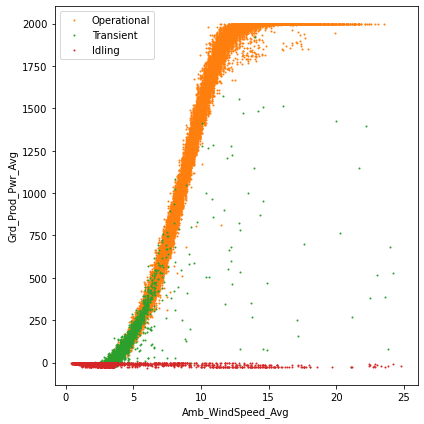

In [28]:
# Plot the power curve for different status flags
fig4 = plt.figure(figsize = (6,6))
plt.plot(InputData.Amb_WindSpeed_Avg[TurbineOK & T01mask],InputData.Grd_Prod_Pwr_Avg[TurbineOK & T01mask],'.',markersize = 2, color = 'C1')
plt.plot(InputData.Amb_WindSpeed_Avg[TurbineTransient & T01mask],InputData.Grd_Prod_Pwr_Avg[TurbineTransient & T01mask],'.',markersize = 2, color = 'C2')
plt.plot(InputData.Amb_WindSpeed_Avg[TurbineIdling & T01mask],InputData.Grd_Prod_Pwr_Avg[TurbineIdling & T01mask],'.',markersize = 2, color = 'C3')
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Avg')
plt.legend(['Operational','Transient','Idling'])
plt.tight_layout()             
plt.show()

### 2.2 Feature list

In [29]:
ChannelList = ['Amb_WindSpeed','Grd_Prod_Pwr','Gen_RPM','Blds_PitchAngle']
StatsList = ['Avg','Std','Min','Max']
Nfeatures = len(ChannelList)*len(StatsList)
nsamples = InputData.index.shape[0]
FeatureList = pd.DataFrame()

for i in ChannelList:
    for j in StatsList:
        FeatureListName = i + '_' + j
        FeatureList[FeatureListName] = InputData[FeatureListName]        
        
FeatureList

,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindSpeed_Min,Amb_WindSpeed_Max,Grd_Prod_Pwr_Avg,Grd_Prod_Pwr_Std,Grd_Prod_Pwr_Min,Grd_Prod_Pwr_Max,Gen_RPM_Avg,Gen_RPM_Std,Gen_RPM_Min,Gen_RPM_Max,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,Blds_PitchAngle_Min,Blds_PitchAngle_Max
Timestamp,,,,,,,,,,,,,,,,
2017-01-01 00:00:00+00:00,6.0,0.9,1.7,12.2,384.7,59.4,242.5,618.4,1336.5,47.6,1255.3,1513.4,-1.8,0.3,-2.2,-1.1
2017-01-01 00:00:00+00:00,7.9,1.2,2.4,14.6,859.8,185.9,412.2,1221.3,1596.9,68.6,1377.7,1679.5,-2.2,0.2,-3.3,-0.8
2017-01-01 00:00:00+00:00,5.6,1.1,1.5,10.0,291.5,62.9,129.6,428.7,1313.7,47.9,1239.2,1460.9,-1.5,0.4,-2.2,-0.2
2017-01-01 00:00:00+00:00,5.8,0.9,2.5,9.7,378.1,71.9,239.1,592.8,1318.6,52.4,1236.3,1464.0,-1.7,0.4,-2.3,0.6
2017-01-01 00:10:00+00:00,4.9,1.0,1.5,18.5,207.5,55.0,98.0,413.8,1271.3,27.6,1229.4,1410.6,-1.0,0.4,-2.3,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 23:40:00+00:00,5.4,0.9,1.6,17.6,288.2,63.4,125.4,415.4,1268.9,37.3,1221.0,1421.2,-1.5,0.5,-2.4,-0.2
2017-12-31 23:50:00+00:00,4.7,0.8,2.2,6.5,182.8,73.3,27.2,340.3,1249.4,6.6,1229.6,1270.8,-1.0,0.4,-1.7,0.6
2017-12-31 23:50:00+00:00,5.5,0.8,2.2,8.8,300.7,52.1,214.5,465.3,1262.0,20.6,1216.8,1320.5,-1.6,0.4,-2.3,-0.4


In [30]:
TargetClasses = InputData.Status_Flag
TargetClasses

Timestamp
2017-01-01 00:00:00+00:00    0
2017-01-01 00:00:00+00:00    0
2017-01-01 00:00:00+00:00    0
2017-01-01 00:00:00+00:00    0
2017-01-01 00:10:00+00:00    0
                            ..
2017-12-31 23:40:00+00:00    0
2017-12-31 23:50:00+00:00    0
2017-12-31 23:50:00+00:00    0
2017-12-31 23:50:00+00:00    0
2017-12-31 23:50:00+00:00    0
Name: Status_Flag, Length: 209236, dtype: int64

<AxesSubplot:xlabel='Amb_WindSpeed_Avg', ylabel='Count'>

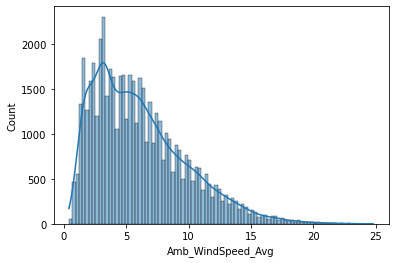

In [31]:
sns.histplot(InputData.loc[T01mask], x='Amb_WindSpeed_Avg', kde=True)


In [32]:
sns.histplot?

In [43]:
InputData.Turbine_ID.unique()

array(['T07', 'T11', 'T01', 'T06'], dtype=object)

Text(0.5, 0, 'Amb Wind Speed for T01')

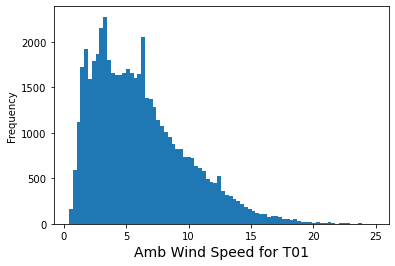

In [58]:
plt.figure()
InputData[InputData['Turbine_ID']=='T01'].Amb_WindSpeed_Avg.plot(kind='hist', bins=80)
plt.xlabel('Amb Wind Speed for T01', fontsize=14)
#InputData[InputData['Turbine_ID']=='T06'].Amb_WindSpeed_Avg.plot()

In [57]:
#Weibull fit
from scipy import optimize
from scipy.stats import weibull_min

<AxesSubplot:xlabel='Timestamp'>

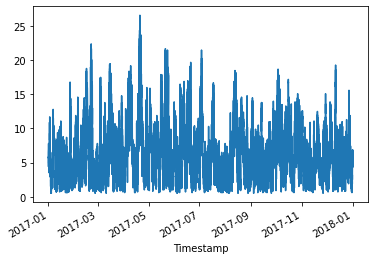

In [47]:
InputData[InputData['Turbine_ID']=='T06'].Amb_WindSpeed_Avg.plot()